## 1.  Introduction
Titanic dataset is the most basic dataset available on Kaggle. In this project I will be predicting the survival of the passengers from the Kaggle dataset using Machine Learning algorithms.

## 2. Data Gathering

In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [430]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [431]:
# Reading the training file
df = pd.read_csv(r'C:\Users\srini\Projects\Titanic\train (2).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Wrangling

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [433]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### Finding duplicates

In [434]:
# finding duplicates in the data
df.duplicated().sum()

0

#### Finding Missing values

In [435]:
# finding missing values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are only Age and embarked columns that have missing value and are of our interest. The Cabin column is not very useful for our current analysis.

In [436]:
# making a copy of the dataset before cleaning
df_copy= df.copy()

There are some rows with missing age. We will explore them further.

In [437]:
# missing age
df[df.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [438]:
# Exporing the sibling-spouse column
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [439]:
# exploring the patriarchial column
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [440]:
def cleaning_func(df):
    """Creating a function that will handle the cleaning of the dataframe"""
    # filling the mean value for age for the missing data
    #df.Age.fillna(df.Age.mean(),inplace= True )
    
    # Filling the median value for the missing values
    df.Age.fillna(df.Age.median(),inplace= True )
    
    # making binary values for the Sex column
    df.Sex.replace({'male':1, 'female':0}, inplace= True)
    
    # Creating dummy columns for the Class of the passengers
    df= pd.concat([df, pd.get_dummies(df.Pclass)], axis=1 )
    
    # Creating dummies for the Embarked category
    df= pd.concat([df, pd.get_dummies(df.Embarked)], axis=1)
    
    # Creating a new feature for fare by taking logarithmic value
    df['log_fare']= df.Fare.apply(lambda x: -5 if x==0 or x is np.nan else np.log(x))
    
    return df

In [441]:
# cleaning the function df
df= cleaning_func(df_copy)

In [442]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S,log_fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0,4.266662


## Data Exploration

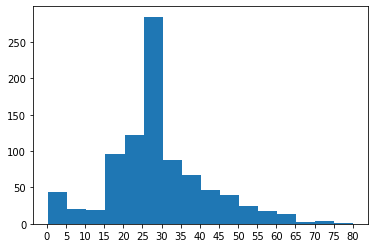

In [443]:
# Finding distribution for the age
plt.hist(df_copy.Age, bins=16)
plt.xticks(np.arange(0,81,5))
plt.show()

There seems to be buge number of people who are between 25 and 30 years old. There are also several small children in 0-5 years category.

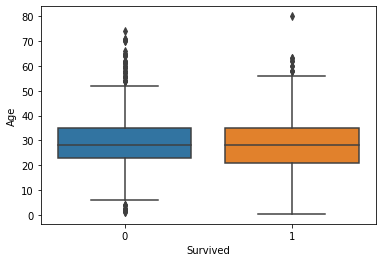

In [444]:
# finding if there is a difference between age of people who survived and died
sns.boxplot(x=df.Survived, y=df.Age)
plt.show()

There does not seem to be much difference between the age of the people who survived and who died.

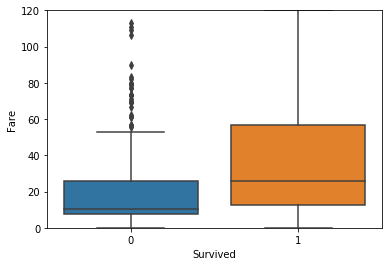

In [445]:
# finding if there is a difference between price of ticket for the people who survived and died
sns.boxplot(x=df.Survived, y=df.Fare)
plt.ylim(0,120)
plt.show()

This shows that most of the people who survived were people who had purchased more expensive ticket.

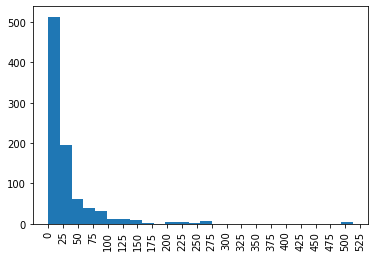

In [414]:
# distribution for the fare of the people
plt.hist(df.Fare, bins=26)
plt.xticks(np.arange(0,526,25),rotation=90)
#plt.xlim(0,150)
plt.show()

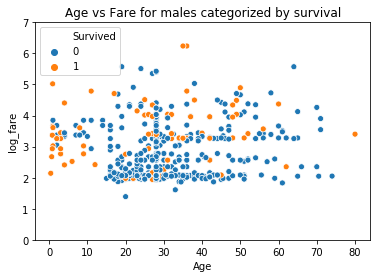

In [451]:
# Scatterplot for Age and Fare colored by survivorship for males
sns.scatterplot(x=df.query('Sex==1').Age, y= df.query('Sex==1').log_fare, hue= df.query('Sex==1').Survived)
plt.ylim(0,7)
plt.title('Age vs Fare for males categorized by survival')
plt.show()

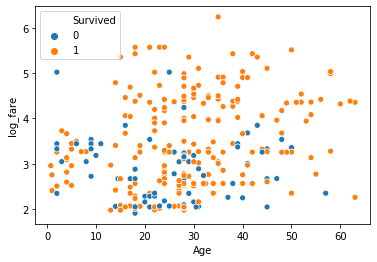

In [450]:
# Scatterplot for Age and Fare colored by survivorship for females
sns.scatterplot(x=df.query('Sex==0').Age, y= df.query('Sex==0').log_fare, hue= df.query('Sex==0').Survived)
#plt.ylim(0,7)
plt.show()

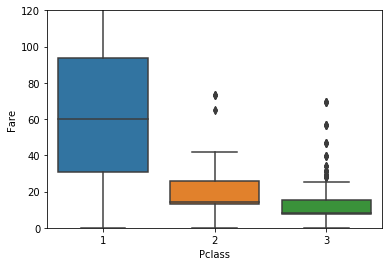

In [60]:
# distribution of the price of the ticket and the class
sns.boxplot(x=df.Pclass, y=df.Fare)
plt.ylim(0,120)
plt.show()

In [63]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,0


In [66]:
X= df[['Sex','Age','Fare',1,2,3,'C','Q','S']]
y= df['Survived']

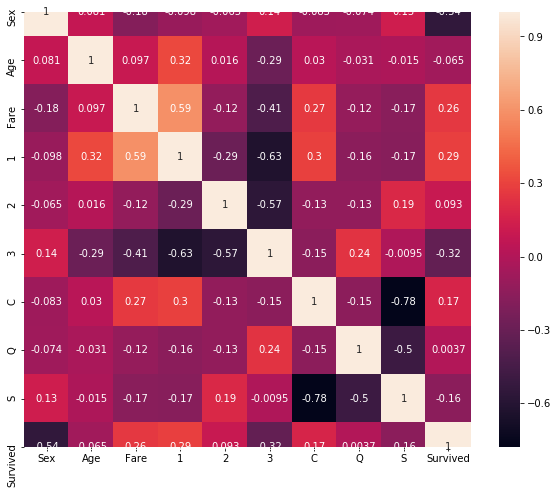

In [461]:
# finding the correlation between the predictors
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame.corr(df[['Sex','Age','Fare',1,2,3,'C','Q','S','Survived']]), annot=True)
plt.show()

So there is not much coreraltion betweent the predictors except the dummy variables.

## Creating a pipeline

In [452]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,C,Q,S,log_fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S,0,0,1,0,0,1,1.981001


In [453]:
X= df[['Sex','Age','Fare',1,2,3,'C','Q','S']]
y= df['Survived']

# Splitting data into testing and training by excluding the Sibling-spouse and the Parch columns
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1, stratify=y )
X_train.shape, X_test.shape, y_train.shape

## Machine Learning
### 1. Logistic Regression

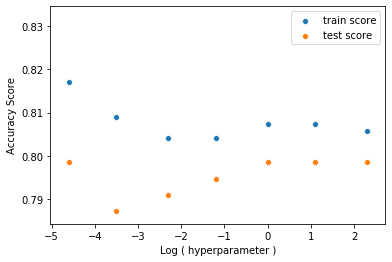

In [455]:
# Modelling logistic regression to the data
hyperparameter= [0.01, 0.03,0.1,0.3,1,3,10]
train_score_list=[]
test_score_list=[]

for c in hyperparameter:
    
    my_pipeline= Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs',C=c ))])
    
    my_pipeline.fit(X_train, y_train)
    
    train_pred= my_pipeline.predict(X_train)
    test_pred= my_pipeline.predict(X_test)
    
    train_score_list.append(accuracy_score(y_train, train_pred))
    test_score_list.append(accuracy_score(y_test, test_pred))

# plotting the accuracy vs the hyper-parameter
sns.scatterplot(x=np.log(hyperparameter), y=train_score_list, label= 'train score')
sns.scatterplot(x=np.log(hyperparameter), y=test_score_list, label='test score')
plt.legend()
plt.xlabel('Log ( hyperparameter )')
plt.ylabel('Accuracy Score')
plt.show()

Since the training and test score are quite low. We will use polynomial feature to see if we can get a better score.

### 1.2 Logistic Regression with Polynomial features

In [456]:
# Modelling logistic regression to the data
hyperparameter= [0.01, 0.03,0.1,0.3,1,3,10,30,100]
train_score_list=[]
test_score_list=[]

for c in hyperparameter:
    
    my_pipeline= Pipeline([
    ('poly', PolynomialFeatures(degree=2,interaction_only=True )),
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs',C=c,max_iter=300,   ))])
    
    my_pipeline.fit(X_train, y_train)
    
    train_pred= my_pipeline.predict(X_train)
    test_pred= my_pipeline.predict(X_test)
    
    train_score_list.append(accuracy_score(y_train, train_pred))
    test_score_list.append(accuracy_score(y_test, test_pred))

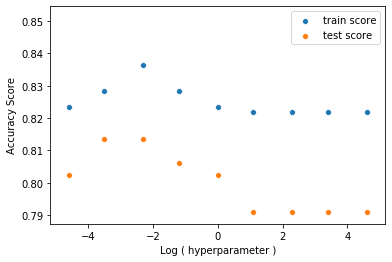

In [457]:
# plotting the accuracy vs the hyper-parameter
sns.scatterplot(x=np.log(hyperparameter), y=train_score_list, label= 'train score')
sns.scatterplot(x=np.log(hyperparameter), y=test_score_list, label='test score')
plt.legend()
plt.xlabel('Log ( hyperparameter )')
plt.ylabel('Accuracy Score')
plt.show()

Using the log fare instead of the fare column.

In [458]:
X= df[['Sex','Age','log_fare',1,2,3,'C','Q','S']]
y= df['Survived']

# Splitting data into testing and training by excluding the Sibling-spouse and the Parch columns
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=1, stratify=y )
X_train.shape, X_test.shape, y_train.shape

((623, 9), (268, 9), (623,))

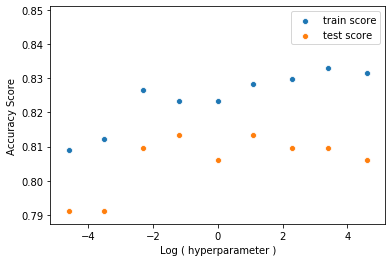

In [459]:
# Modelling logistic regression to the data
hyperparameter= [0.01, 0.03,0.1,0.3,1,3,10,30,100]
train_score_list=[]
test_score_list=[]

for c in hyperparameter:
    
    my_pipeline= Pipeline([
    ('poly', PolynomialFeatures(degree=2,interaction_only=True )),
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs',C=c,max_iter=300,   ))])
    
    my_pipeline.fit(X_train, y_train)
    
    train_pred= my_pipeline.predict(X_train)
    test_pred= my_pipeline.predict(X_test)
    
    train_score_list.append(accuracy_score(y_train, train_pred))
    test_score_list.append(accuracy_score(y_test, test_pred))
    
# plotting the accuracy vs the hyper-parameter
sns.scatterplot(x=np.log(hyperparameter), y=train_score_list, label= 'train score')
sns.scatterplot(x=np.log(hyperparameter), y=test_score_list, label='test score')
plt.legend()
plt.xlabel('Log ( hyperparameter )')
plt.ylabel('Accuracy Score')
plt.show()

The best test score occurs at C=0.3. However this test accuracy is only 0.83. We will explore other algorithms for modelling.

### RandomForest Classifier

In [460]:
# Using Grid Search to find the best hyper-parameters
train_score_list=[]
test_score_list=[]

my_pipeline= Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=50) )])

my_parameters= {'poly__degree': [1,2,3],
    'clf__max_depth':[300,400,None],'clf__min_samples_leaf':[1,2,3],'clf__min_samples_split':[2,3,4] }

grid= GridSearchCV(estimator=my_pipeline, param_grid= my_parameters, scoring='accuracy',n_jobs=2,cv=3,\
                 )

grid.fit(X_train, y_train)

train_pred= grid.predict(X_train)
test_pred= grid.predict(X_test)

train_score_list.append(accuracy_score(y_train, train_pred))
test_score_list.append(accuracy_score(y_test, test_pred))

train_score_list, test_score_list

([0.913322632423756], [0.8134328358208955])

This shows that even with the best hyperparameters the Random Forest Classifier does not score much better than the Logistic regression classifier.

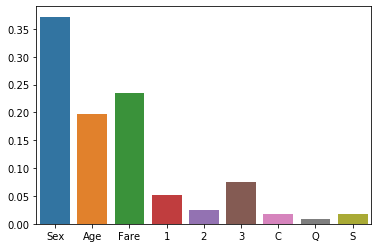

In [358]:
# Finding which features have higher importance
importance= grid.best_estimator_.named_steps['clf'].feature_importances_
    
sns.barplot(x= X.columns, y=importance[1:])
plt.show()

Removing the boarding station information to see if our model will less overfit the training data.

In [372]:
X= df[['Sex','Age','Fare',1,2,3]]
y= df['Survived']

# Splitting data into testing and training by excluding the Sibling-spouse and the Parch columns
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=1, stratify=y )
X_train.shape, X_test.shape, y_train.shape

((668, 6), (223, 6), (668,))

In [392]:
# Using Grid Search to find the best hyper-parameters
train_score_list=[]
test_score_list=[]

my_pipeline= Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('clf', RandomForestClassifier() )])

my_parameters= {'poly__degree': [1,2],
    'clf__n_estimators':[10,20,50,80],
    'clf__max_depth':[200,300,400],'clf__min_samples_leaf':[1,2,3,4,5],'clf__min_samples_split':[2,3,4,5] }

grid= GridSearchCV(estimator=my_pipeline, param_grid= my_parameters, scoring='accuracy',n_jobs=2,cv=3,)

grid.fit(X_train, y_train)

train_pred= grid.predict(X_train)
test_pred= grid.predict(X_test)

train_score_list.append(accuracy_score(y_train, train_pred))
test_score_list.append(accuracy_score(y_test, test_pred))

train_score_list, test_score_list

([0.8832335329341318], [0.8026905829596412])

In [394]:
# Finding which features have higher importance
importance= grid.best_estimator_.named_steps['clf'].feature_importances_
importance    
# sns.barplot(x= X.columns, y=importance[1:])
# plt.show()

array([0.        , 0.08694089, 0.04182318, 0.06229468, 0.01155761,
       0.00464867, 0.01761629, 0.1119666 , 0.12988405, 0.10467868,
       0.01292504, 0.01325835, 0.01525781, 0.04340855, 0.06419451,
       0.01765892, 0.00751035, 0.06548193, 0.05548554, 0.03353645,
       0.00589681, 0.05519318, 0.01028747, 0.        , 0.        ,
       0.00396233, 0.        , 0.0245321 ])

In [395]:
grid.best_estimator_
# my_pipeline= Pipeline([
#     ('std', StandardScaler()),
#     ('clf', RandomForestClassifier(n_estimators=50, max_depth=300,min_samples_leaf=5,min_samples_split=4 ) )])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=200,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=80, n_jobs=None,
                                        oob_score=False, random_stat

### Ada Boost

In [277]:
train_score_list=[]
test_score_list=[]

my_pipeline= Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('clf', AdaBoostClassifier(n_estimators=50, ) )])

my_parameters={'poly__degree':[1,2,3] }

grid= GridSearchCV(estimator=my_pipeline, param_grid=my_parameters, scoring= 'accuracy',n_jobs=2, cv=3,  )

grid.fit(X_train, y_train)

train_pred= grid.predict(X_train)
test_pred= grid.predict(X_test)

train_score_list.append(accuracy_score(y_train, train_pred))
test_score_list.append(accuracy_score(y_test, test_pred))

train_score_list, test_score_list

([0.8413173652694611], [0.7757847533632287])

In [281]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=1.0, n_estimators=50,
                                    random_state=None))],
         verbose=False)

### SVM

In [301]:
train_score_list=[]
test_score_list=[]

hyperparameter= [0.01, 0.03,0.1,0.3,1,3,10,30,100]


for c in hyperparameter:
    my_pipeline= Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('std', MinMaxScaler()),
        ('clf', SVC(gamma='auto', C=c,kernel='rbf' ) )])

    my_pipeline.fit(X_train, y_train)

    train_pred= my_pipeline.predict(X_train)
    test_pred= my_pipeline.predict(X_test)

    train_score_list.append(accuracy_score(y_train, train_pred))
    test_score_list.append(accuracy_score(y_test, test_pred))

    train_score_list, test_score_list

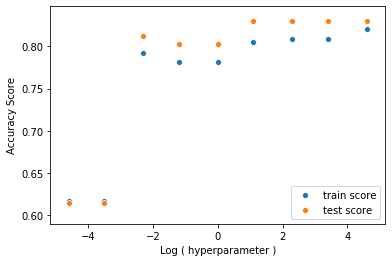

In [302]:
# plotting the accuracy vs the hyper-parameter
sns.scatterplot(x=np.log(hyperparameter), y=train_score_list, label= 'train score')
sns.scatterplot(x=np.log(hyperparameter), y=test_score_list, label='test score')
plt.legend()
plt.xlabel('Log ( hyperparameter )')
plt.ylabel('Accuracy Score')
plt.show()

Using Grid Search with SVM algorithm to find the best hyper-parameters

In [304]:
train_score_list=[]
test_score_list=[]

my_pipeline= Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('clf', SVC(gamma='auto' ) )])

my_parameters= {'poly__degree':[1,2], 'clf__C':[0.01,0.03,0.1,0.3,1,3,10,30], 'clf__kernel': ['rbf','linear','poly'],
               'clf__degree': [3,4]}
grid= GridSearchCV(estimator=my_pipeline, param_grid= my_parameters, scoring= 'accuracy',n_jobs=2, cv=3  )

grid.fit(X_train, y_train)

train_pred= grid.predict(X_train)
test_pred= grid.predict(X_test)

train_score_list.append(accuracy_score(y_train, train_pred))
test_score_list.append(accuracy_score(y_test, test_pred))

train_score_list, test_score_list

([0.8083832335329342], [0.8251121076233184])

In [383]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=300,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=3, min_samples_split=3,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=50, n_jobs=None,
                                        oob_score=False, random_stat

In [ ]:
my_pipeline= Pipeline([
    ('poly', PolynomialFeatures()),
    ('std', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=50, max_depth=300, min_samples_leaf=3, min_samples_split=3) )])

### Best Algorithm

In [379]:
# Best Algorithm and best parameters using Logistic Regression
my_pipeline= Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('std', StandardScaler()),
    ('clf', LogisticRegression(solver='lbfgs',C=1,max_iter=300  ))])

my_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=True, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

### Reading Test Data

In [381]:
def processing_submission():
    """Function to clean the test data, fit the best model and outputs the submission file to the local folder"""
    #reading the csv file
    test= pd.read_csv(r'C:\Users\srini\Projects\Titanic\test (2).csv')
    
    #wrangling the data using the cleaning_function
    test_clean= cleaning_func(test)
    
    # Filling the empty Fare value
    test_clean.Fare.fillna(test_clean.Fare.median(), inplace= True)
    
    #Creating a X dataset
    X_test_df = test_clean[['Sex','Age','Fare',1,2,3]]
    
    #predicting the values using the model
    submission_pred= my_pipeline.predict(X_test_df)
    
    sub_df= pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':submission_pred})
    
    #exporting
    sub_df.to_csv(r'C:\Users\srini\Projects\Titanic\submission5.csv' ,index=False)

In [382]:
processing_submission()

#### Leadership board on Kaggle
The below shows the accuracy of the distribution that other teams got on Kaggle

In [168]:
# reading the file
leaderboard= pd.read_csv(r'C:\Users\srini\Downloads\publicleaderboarddata\titanic-publicleaderboard.csv')
leaderboard.head(3)

,TeamId,TeamName,SubmissionDate,Score
0,26150,Gabe Neslin,2012-10-21 02:18:41,0.76555
1,26585,Amitendra Kumar,2012-10-25 11:03:36,0.49760
2,26585,Amitendra Kumar,2012-10-26 06:05:31,0.55980


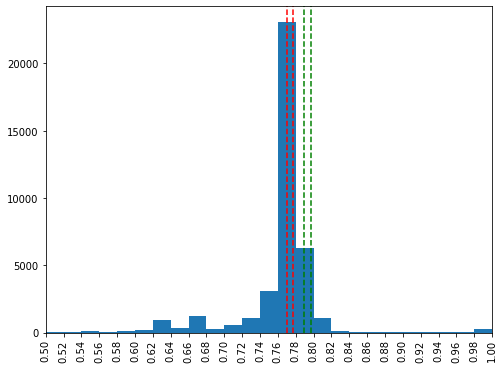

In [186]:
# making a histogram for the distribution of the leaderboard

plt.figure(figsize=(8,6))
plt.hist(leaderboard.Score, bins=50)
plt.xticks(np.arange(0.5,1.01,0.02), rotation=90)
plt.axvline(np.median(leaderboard.Score), color='r', linestyle='--')
plt.axvline(np.percentile(leaderboard.Score, 75), color='r', linestyle='--')
plt.axvline(np.percentile(leaderboard.Score, 90), color='g', linestyle='--')
plt.axvline(np.percentile(leaderboard.Score, 95), color='g', linestyle='--')
plt.xlim(0.5,1)
plt.show()